In [1]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

ON_KAGGLE = Path("/kaggle").exists()
competition_name = "playground-series-s6e2"
if ON_KAGGLE:
    sys.path.insert(0, "/kaggle/input/kaggle-utils")
    %run /kaggle/input/kaggle-utils/stat_funcs.py
    train_df = pd.read_csv(f"/kaggle/input/{competition_name}/train.csv")
    test_df  = pd.read_csv(f"/kaggle/input/{competition_name}/test.csv")
else:
    %run ../../utils/stat_funcs.py
    train_df = pd.read_csv("../../data-raw/train.csv")
    test_df  = pd.read_csv("../../data-raw/test.csv")

print("custom functions are now available in the notebook namespace!")
print("Libraries loaded successfully!")

custom functions are now available in the notebook namespace!
Libraries loaded successfully!


# Data Exploration

Target column: `Heart Disease`

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

For each `id` in the test set, you must predict a probability for the `Heart Disease` target.

```csv
id,Heart Disease
630000,0.2
630001,0.3
630002,0.1
```

In [2]:
train_df.head(10)

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence
5,5,38,1,4,138,283,0,0,147,1,1.6,2,2,7,Presence
6,6,59,1,4,130,246,0,2,152,0,0.8,2,2,3,Presence
7,7,60,0,3,120,245,0,0,151,0,1.2,1,0,3,Absence
8,8,48,0,4,140,212,0,2,125,0,0.0,1,0,3,Absence
9,9,44,0,4,150,197,0,0,150,0,0.0,2,0,3,Absence


Missing values

In [3]:
train_df.isnull().sum()

id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Data Types

In [4]:
train_df.dtypes

id                           int64
Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

Number of unique values in each column

In [5]:
train_df.nunique().sort_values(ascending=False)

id                         630000
Cholesterol                   150
Max HR                         93
BP                             66
ST depression                  66
Age                            42
Chest pain type                 4
Number of vessels fluro         4
EKG results                     3
Slope of ST                     3
Thallium                        3
Sex                             2
FBS over 120                    2
Exercise angina                 2
Heart Disease                   2
dtype: int64

In [6]:
print(train_df.columns.to_list())

['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']


In [7]:
train_df.columns = train_df.columns.str.strip().str.lower().str.replace(" ", "_")

In [8]:
print(train_df.columns.to_list())

['id', 'age', 'sex', 'chest_pain_type', 'bp', 'cholesterol', 'fbs_over_120', 'ekg_results', 'max_hr', 'exercise_angina', 'st_depression', 'slope_of_st', 'number_of_vessels_fluro', 'thallium', 'heart_disease']


In [9]:
train_df.nunique().sort_values(ascending=False)

id                         630000
cholesterol                   150
max_hr                         93
bp                             66
st_depression                  66
age                            42
chest_pain_type                 4
number_of_vessels_fluro         4
ekg_results                     3
slope_of_st                     3
thallium                        3
sex                             2
fbs_over_120                    2
exercise_angina                 2
heart_disease                   2
dtype: int64

columns to convert to categorical: `chest_pain_type`, `number_of_vessels_fluro`, `ekg_results`, `slope_of_st`, `thallium`, `sex`, `fbs_over_120`, `exercise_angina`, `heart_disease`


In [25]:
cat_cols = ["chest_pain_type", 
            "number_of_vessels_fluro", 
            "ekg_results", 
            "slope_of_st", 
            "thallium", 
            "sex", 
            "fbs_over_120", 
            "exercise_angina", 
            "heart_disease"]
num_cols = ["age", "bp", "cholesterol", "max_hr", "st_depression"]

In [11]:
train_df[cat_cols] = train_df[cat_cols].astype("category")

In [12]:
train_df.dtypes

id                            int64
age                           int64
sex                        category
chest_pain_type            category
bp                            int64
cholesterol                   int64
fbs_over_120               category
ekg_results                category
max_hr                        int64
exercise_angina            category
st_depression               float64
slope_of_st                category
number_of_vessels_fluro    category
thallium                   category
heart_disease              category
dtype: object

In [13]:
train_df.describe()

,id,age,bp,cholesterol,max_hr,st_depression
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,130.497433,245.011814,152.816763,0.716028
std,181865.479132,8.256301,14.975802,33.681581,19.112927,0.948472
min,0.000000,29.000000,94.000000,126.000000,71.000000,0.000000
25%,157499.750000,48.000000,120.000000,223.000000,142.000000,0.000000
50%,314999.500000,54.000000,130.000000,243.000000,157.000000,0.100000
75%,472499.250000,60.000000,140.000000,269.000000,166.000000,1.400000
max,629999.000000,77.000000,200.000000,564.000000,202.000000,6.200000


In [14]:
train_df.describe(include=["category"])

,sex,chest_pain_type,fbs_over_120,ekg_results,exercise_angina,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
count,630000,630000,630000,630000,630000,630000,630000,630000,630000
unique,2,4,2,3,2,3,4,3,2
top,1,4,0,0,0,1,0,3,Absence
freq,450283,329179,579608,320116,457553,358293,445862,372286,347546


## Heart Disease Analysis

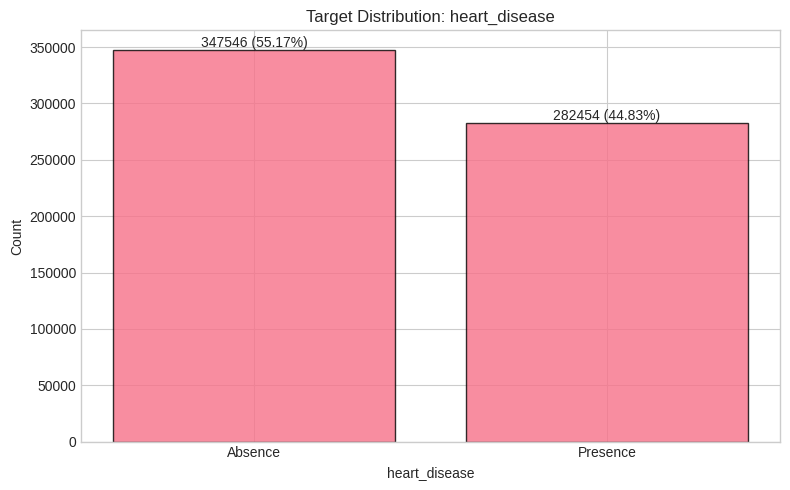

In [17]:
counts = train_df["heart_disease"].value_counts(dropna=False)
pct = train_df["heart_disease"].value_counts(normalize=True, dropna=False).mul(100).round(2)

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(counts.index.astype(str), counts.values, edgecolor="black", alpha=0.8)

ax.set_title("Target Distribution: heart_disease")
ax.set_xlabel("heart_disease")
ax.set_ylabel("Count")

# add labels (count + percent)
for i, (label, c) in enumerate(counts.items()):
    ax.text(i, c, f"{c} ({pct[label]}%)", ha="center", va="bottom")

plt.tight_layout()
plt.show()

In [18]:
s = train_df["heart_disease"]

counts = s.value_counts(dropna=False)
pct = s.value_counts(normalize=True, dropna=False).mul(100)

print("Counts:")
print(counts.to_string())
print("\nPercent:")
print(pct.round(2).astype(str).add("%").to_string())

print(f"\nMode (most common): {s.mode(dropna=False).iloc[0]}")
print(f"Num classes: {s.nunique(dropna=False)}")

Counts:
heart_disease
Absence     347546
Presence    282454

Percent:
heart_disease
Absence     55.17%
Presence    44.83%

Mode (most common): Absence
Num classes: 2


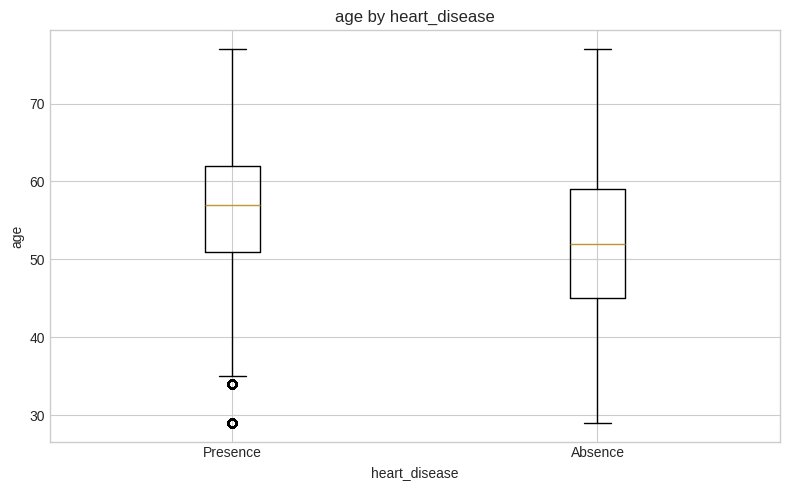

In [19]:
feature = "age"
groups = [
    train_df.loc[train_df["heart_disease"] == cls, feature].dropna()
    for cls in train_df["heart_disease"].dropna().unique()
]
labels = [str(cls) for cls in train_df["heart_disease"].dropna().unique()]

plt.figure(figsize=(8,5))
plt.boxplot(groups, labels=labels)
plt.title(f"{feature} by heart_disease")
plt.xlabel("heart_disease")
plt.ylabel(feature)
plt.tight_layout()
plt.show()

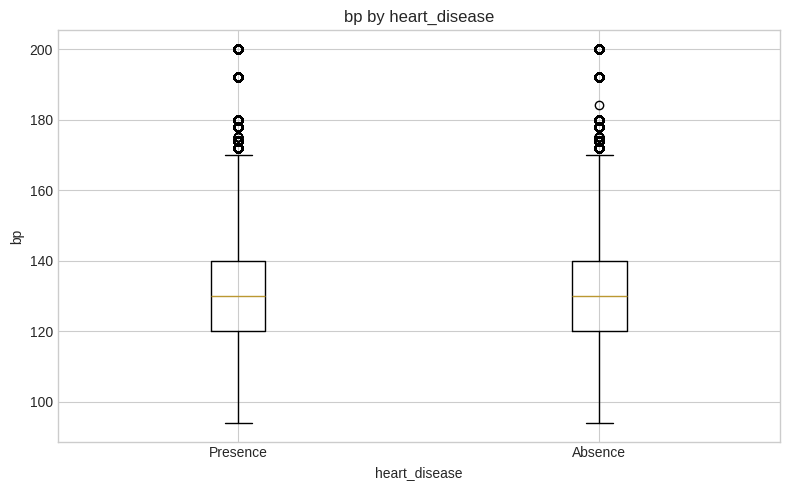

In [20]:
feature = "bp"
groups = [
    train_df.loc[train_df["heart_disease"] == cls, feature].dropna()
    for cls in train_df["heart_disease"].dropna().unique()
]
labels = [str(cls) for cls in train_df["heart_disease"].dropna().unique()]

plt.figure(figsize=(8,5))
plt.boxplot(groups, labels=labels)
plt.title(f"{feature} by heart_disease")
plt.xlabel("heart_disease")
plt.ylabel(feature)
plt.tight_layout()
plt.show()

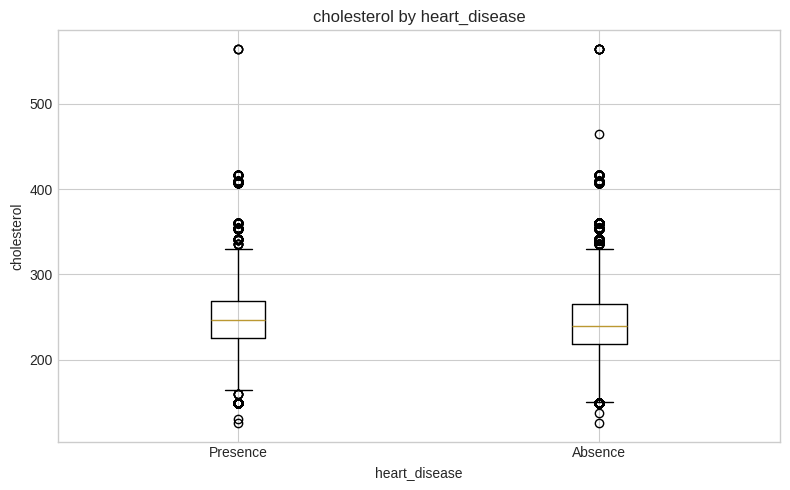

In [21]:
feature = "cholesterol"
groups = [
    train_df.loc[train_df["heart_disease"] == cls, feature].dropna()
    for cls in train_df["heart_disease"].dropna().unique()
]
labels = [str(cls) for cls in train_df["heart_disease"].dropna().unique()]

plt.figure(figsize=(8,5))
plt.boxplot(groups, labels=labels)
plt.title(f"{feature} by heart_disease")
plt.xlabel("heart_disease")
plt.ylabel(feature)
plt.tight_layout()
plt.show()

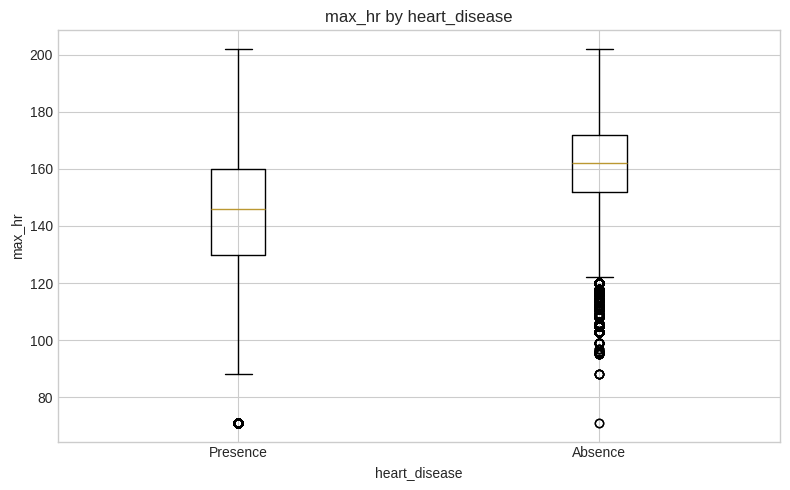

In [22]:
feature = "max_hr"
groups = [
    train_df.loc[train_df["heart_disease"] == cls, feature].dropna()
    for cls in train_df["heart_disease"].dropna().unique()
]
labels = [str(cls) for cls in train_df["heart_disease"].dropna().unique()]

plt.figure(figsize=(8,5))
plt.boxplot(groups, labels=labels)
plt.title(f"{feature} by heart_disease")
plt.xlabel("heart_disease")
plt.ylabel(feature)
plt.tight_layout()
plt.show()

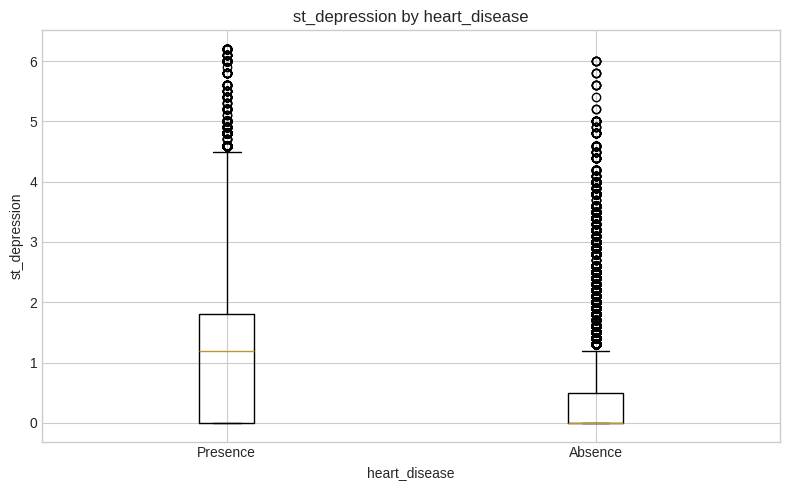

In [23]:
feature = "st_depression"
groups = [
    train_df.loc[train_df["heart_disease"] == cls, feature].dropna()
    for cls in train_df["heart_disease"].dropna().unique()
]
labels = [str(cls) for cls in train_df["heart_disease"].dropna().unique()]

plt.figure(figsize=(8,5))
plt.boxplot(groups, labels=labels)
plt.title(f"{feature} by heart_disease")
plt.xlabel("heart_disease")
plt.ylabel(feature)
plt.tight_layout()
plt.show()

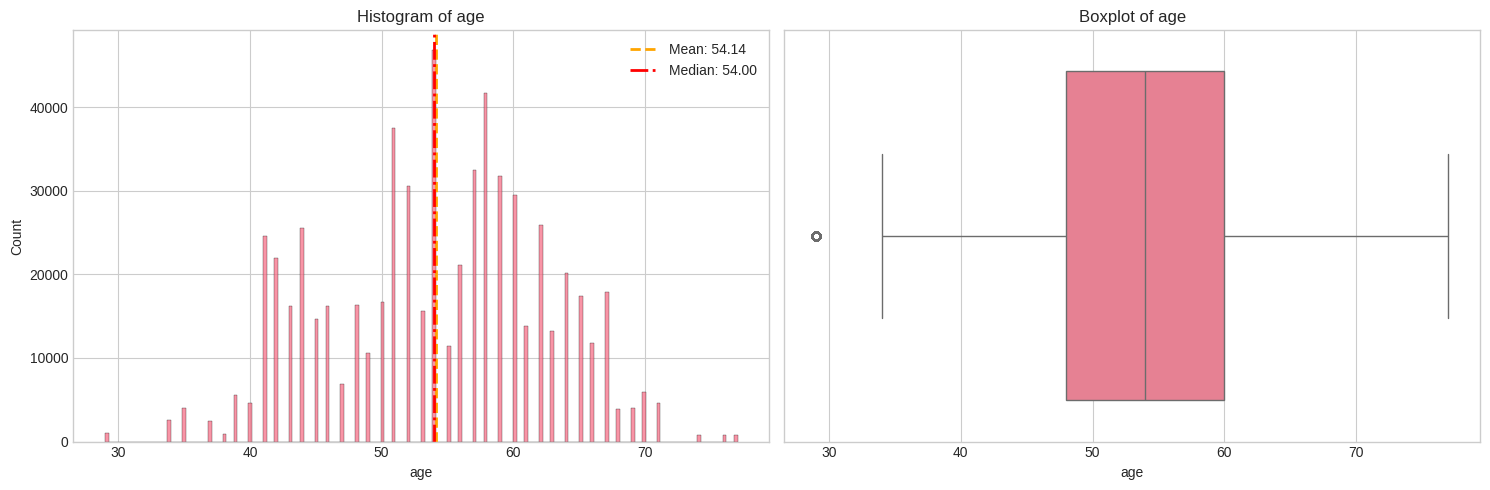

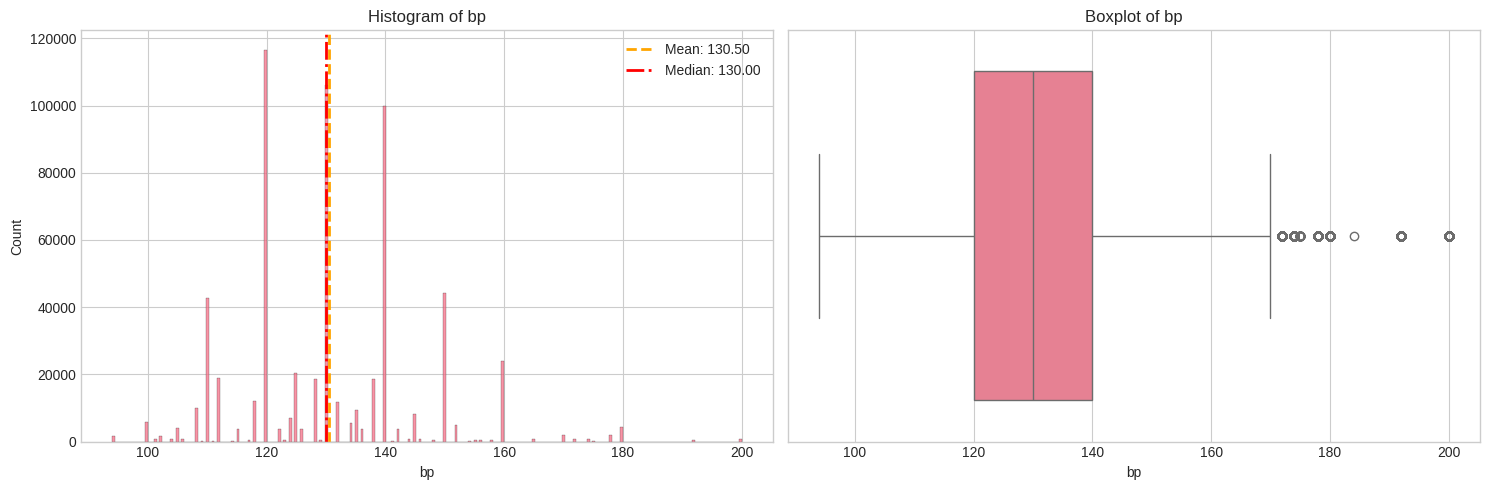

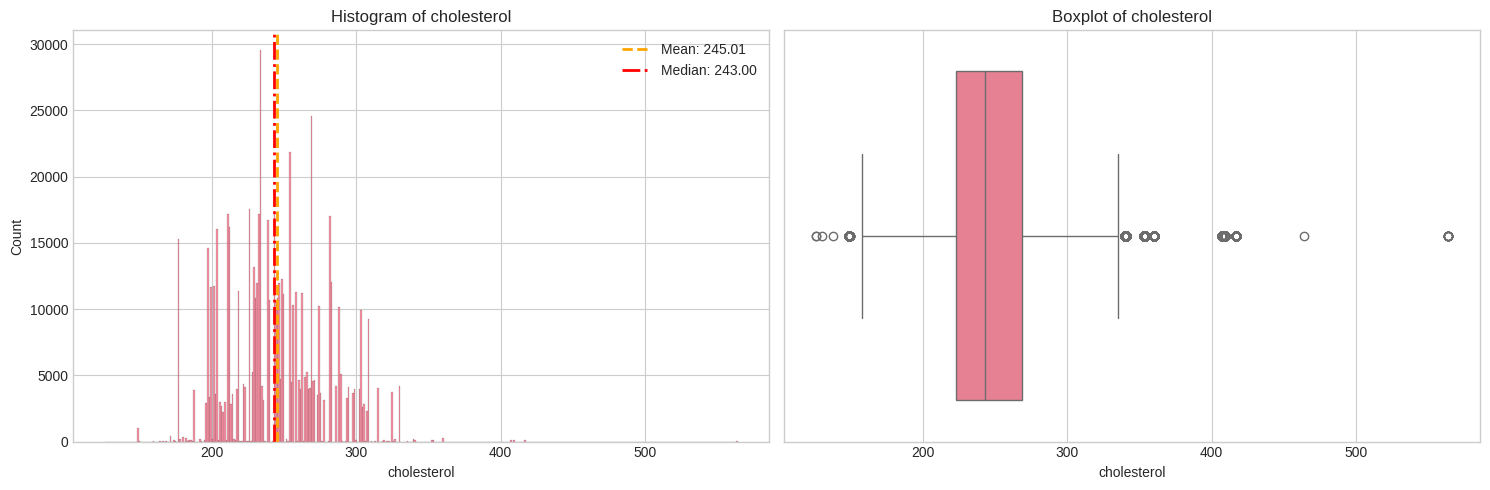

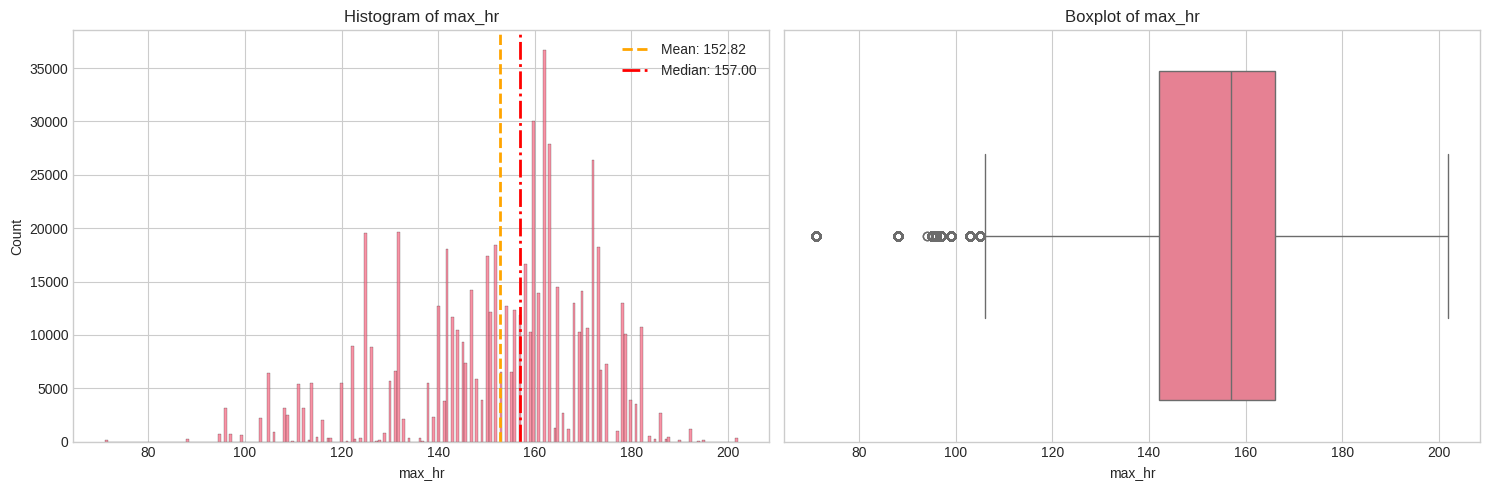

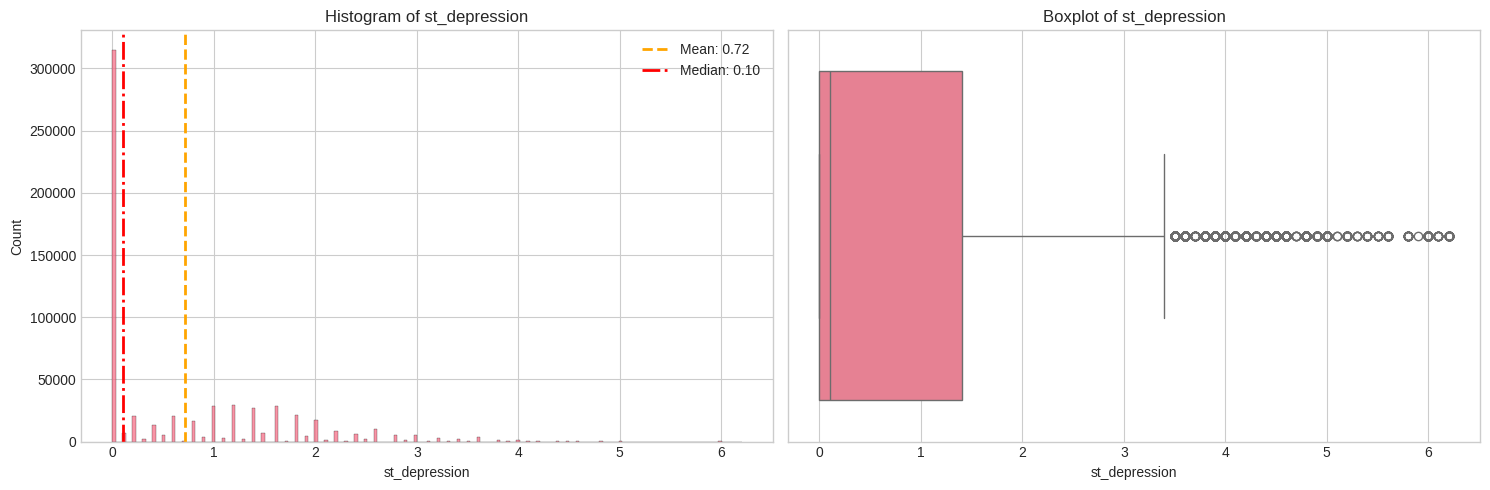

In [27]:
for column in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    sns.histplot(data=train_df, x=column, ax=axes[0])
    mean_value = train_df[column].mean()
    median_value = train_df[column].median()
    axes[0].axvline(mean_value, color='orange', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='red', linestyle='-.', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[0].set_title(f'Histogram of {column}')
    axes[0].legend()

    sns.boxplot(data=train_df, x=column, ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')

    plt.tight_layout()

plt.show()

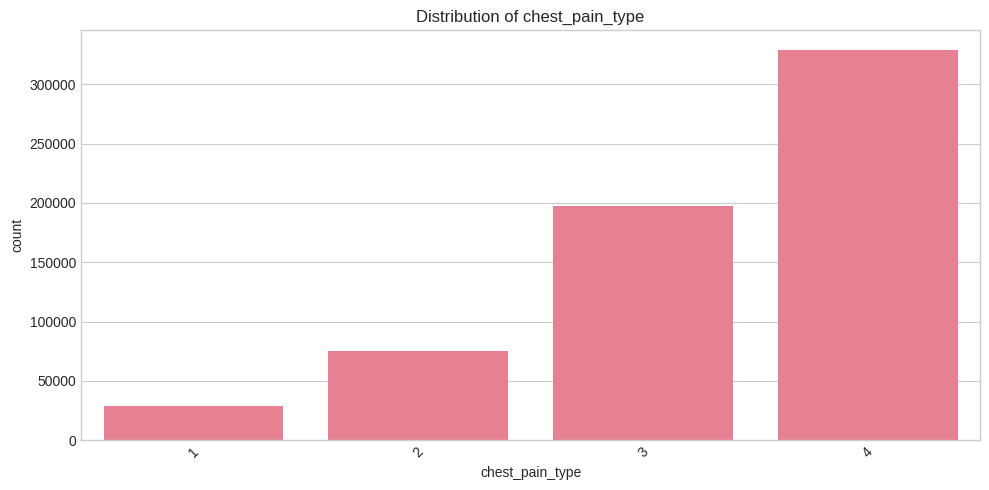

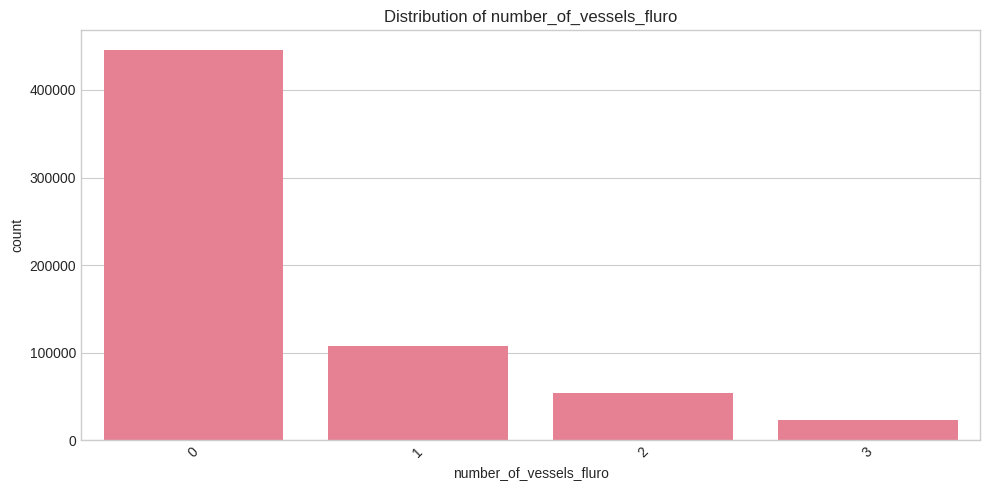

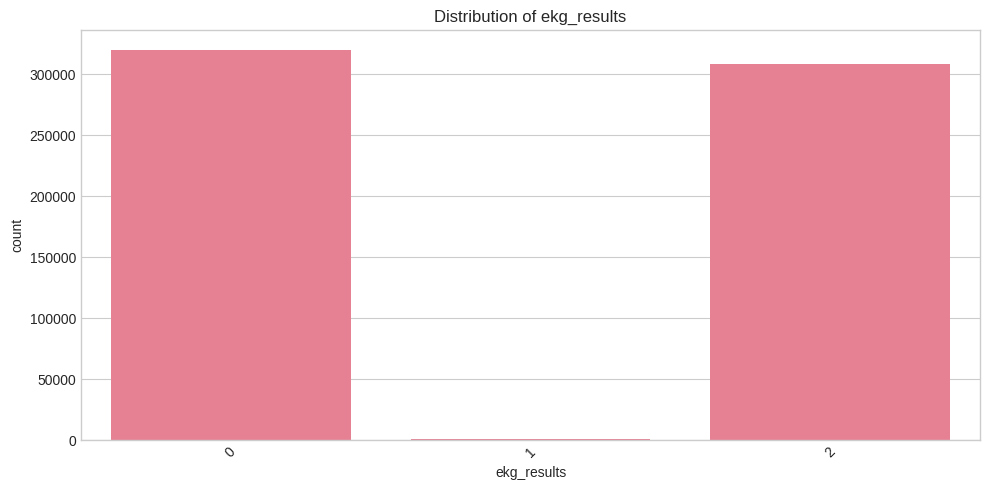

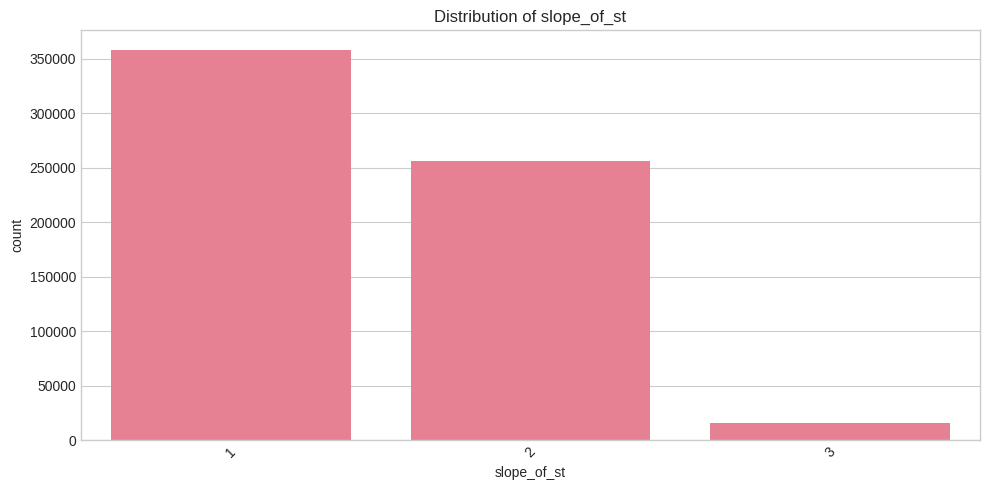

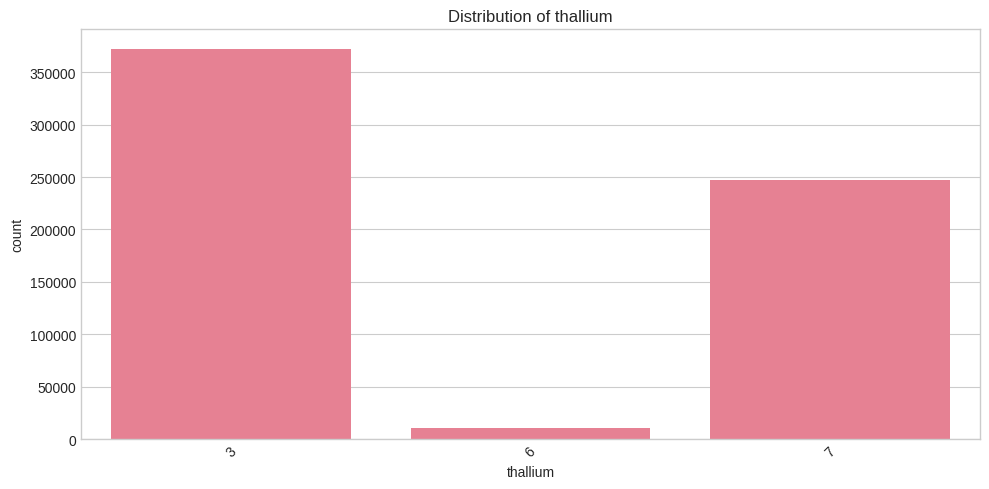

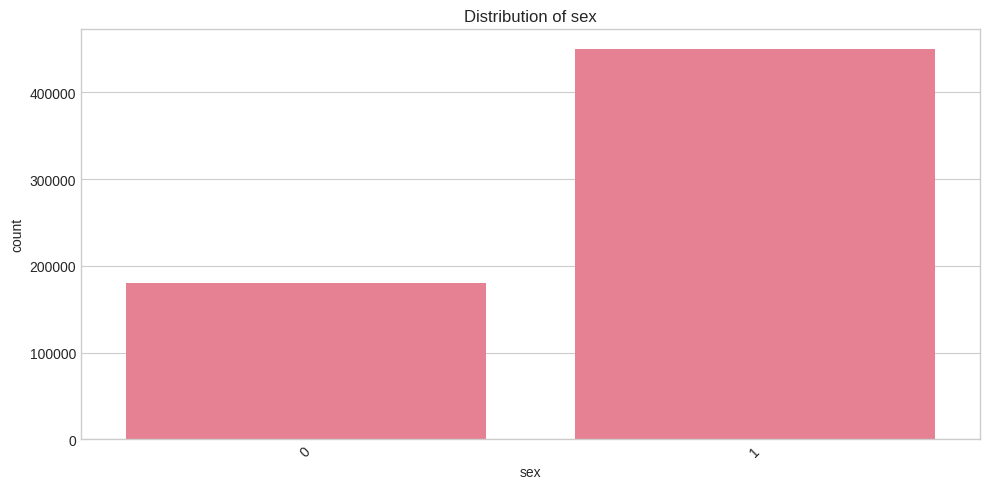

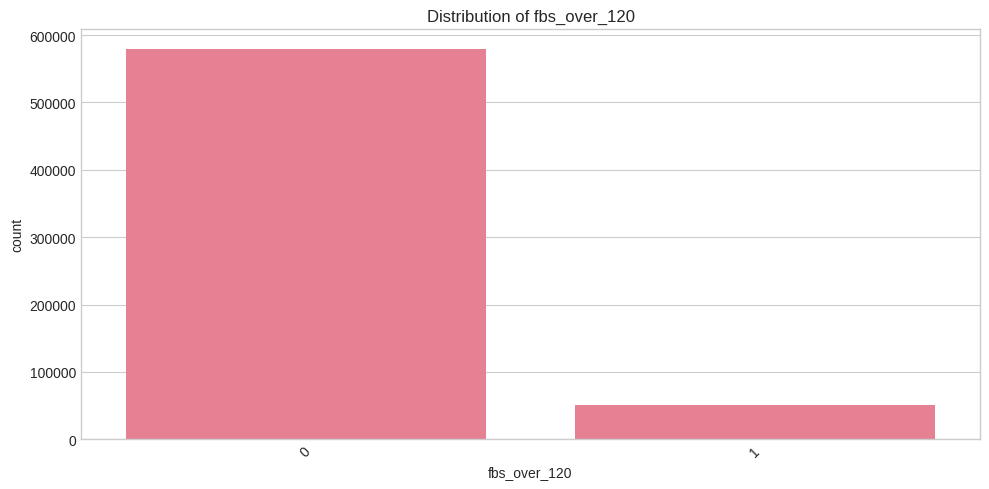

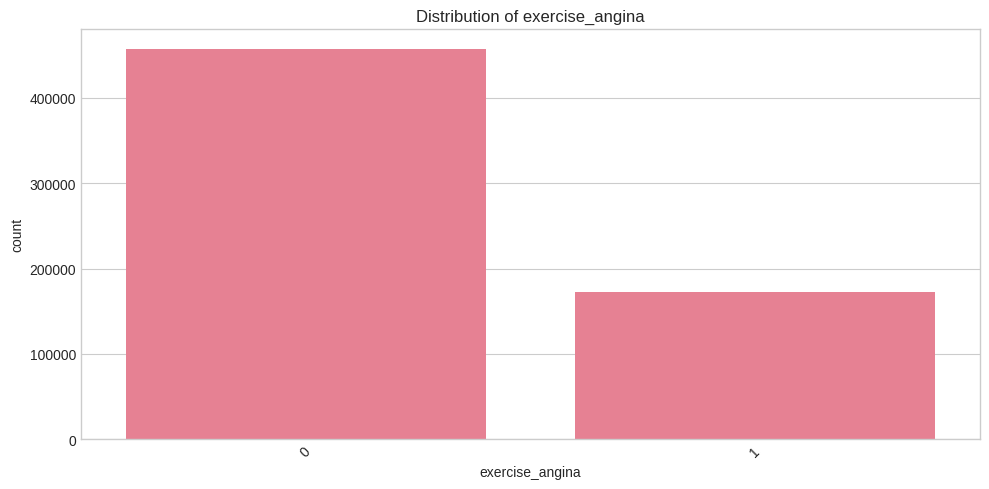

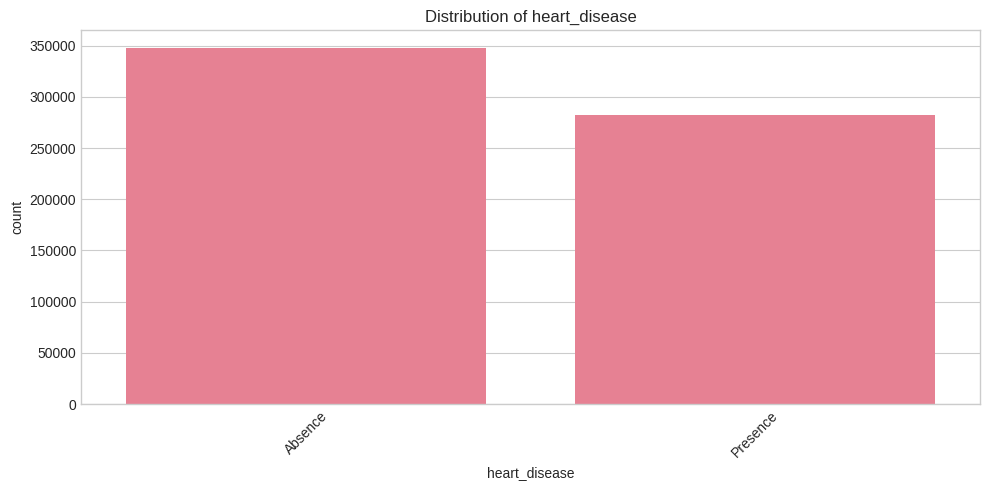

In [28]:
for column in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()